# Dispersion relation calculation - field sweeps #

This example shows how we can sweep parameters of the dispersion and plot different views on the data. In this example we will use the `SingleLayer` class based on the Kalinikos-Slavin model [[*J. Phys. C: Solid State Phys.*, **19**, 7013 (1986)]](https://doi.org/10.1088/0022-3719/19/35/014) and plot field dependency of the selected spin wave properties (e.g. mode frequencies and decay lengths) for specified set of k-vectors. The same approach can be used also with other classes available in SpinWaveToolkit.

Let's start by importing necessary modules and definig material and "experiment" parameters:

In [1]:
#necessary imports
import SpinWaveToolkit as SWT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# prepare arrays with k-vectors and B-field values of interest
k = np.linspace(0, 10e6, 101) # k-vector values in rad/m, 
k[0] = 1e-5 # we use k=1e-5 instead of k=0 to avoid badly conditioned calculations at k=0
B = np.linspace(1e-3, 100e-3, 101) # define values of a field sweep in T
B[0] = 1e-5 # we use B=1e-5 instead of B=0 to avoid badly conditioned calculations at B=0

# Define the experiment geometry
theta = np.pi/2  # (rad) for in-plane magnetization
phi = np.pi/2  # (rad) for Damon-Eshbach geometry

# Define material parameters
# We will use built-in material parameters of NiFe in this example. Bulit in materials are: (NiFe, YIG, CoFeB, FeNi).
mat = SWT.NiFe
d = 30e-9  # (m) layer thickness
bc = 1 # boundary conditions (1 - totally unpinned, 2 - totally pinned spins)

### Calculate dispersions for defined values of external magnetic field ###
Now we can call `SWT.SingleLayer` for every field value and store everything in 2D array.

In [3]:
# Create numpy arrays n0 and decay0 for all fields and k-vectors defined in B and kxi
n0 = [] #initialize list of arrays
decay0 = [] #initialize list of arrays

for index, Bext in enumerate(B):
    sl = SWT.SingleLayer(Bext, mat, d, k, theta, phi, boundary_cond=bc)
    n0.append(sl.GetDispersion(n=0)*1e-9/(2*np.pi)) #Fundamental mode frequency in GHz
    decay0.append(sl.GetDecLen(n=0)*1e6) #Fundamental mode decay length in um
n0 = np.array(n0) # create 2D array from list of arrays
decay0 = np.array(decay0) # create 2D array from list of arrays

### Plot the data #1 ###
Now we can just slice our 2D arrays `n0` and `decay0` and plot whatever we want. Let's start with plotting a field dependence of the fundamental mode frequency (`n0` array) for different values of the k-vector.

In [20]:
# print what k-values we have available in k array in index:value format, separated by |
print("| ".join(f"{i}:{val/1e6:.1f}" for i, val in enumerate(k)))

0:0.0| 1:0.1| 2:0.2| 3:0.3| 4:0.4| 5:0.5| 6:0.6| 7:0.7| 8:0.8| 9:0.9| 10:1.0| 11:1.1| 12:1.2| 13:1.3| 14:1.4| 15:1.5| 16:1.6| 17:1.7| 18:1.8| 19:1.9| 20:2.0| 21:2.1| 22:2.2| 23:2.3| 24:2.4| 25:2.5| 26:2.6| 27:2.7| 28:2.8| 29:2.9| 30:3.0| 31:3.1| 32:3.2| 33:3.3| 34:3.4| 35:3.5| 36:3.6| 37:3.7| 38:3.8| 39:3.9| 40:4.0| 41:4.1| 42:4.2| 43:4.3| 44:4.4| 45:4.5| 46:4.6| 47:4.7| 48:4.8| 49:4.9| 50:5.0| 51:5.1| 52:5.2| 53:5.3| 54:5.4| 55:5.5| 56:5.6| 57:5.7| 58:5.8| 59:5.9| 60:6.0| 61:6.1| 62:6.2| 63:6.3| 64:6.4| 65:6.5| 66:6.6| 67:6.7| 68:6.8| 69:6.9| 70:7.0| 71:7.1| 72:7.2| 73:7.3| 74:7.4| 75:7.5| 76:7.6| 77:7.7| 78:7.8| 79:7.9| 80:8.0| 81:8.1| 82:8.2| 83:8.3| 84:8.4| 85:8.5| 86:8.6| 87:8.7| 88:8.8| 89:8.9| 90:9.0| 91:9.1| 92:9.2| 93:9.3| 94:9.4| 95:9.5| 96:9.6| 97:9.7| 98:9.8| 99:9.9| 100:10.0


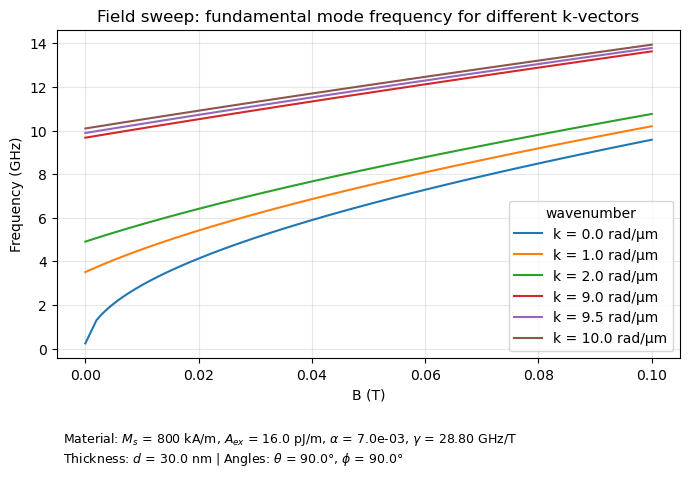

In [22]:
# Choose which k-indices to plot (edit as you like, look at the k-values above)
k_indices = [0, 10, 20, 90, 95, 100]

fig, ax = plt.subplots(figsize=(7, 5))

for ki in k_indices:
    ax.plot(B, n0[:, ki], label=f"k = {k[ki]*1e-6:.1f} rad/μm")

ax.set_xlabel("B (T)")
ax.set_ylabel("Frequency (GHz)")
ax.set_title("Field sweep: fundamental mode frequency for different k-vectors")
ax.grid(True, alpha=0.3)
ax.legend(title="wavenumber")

# --- Info box ---
info_text = (
    r"Material: $M_s$ = {:.0f} kA/m, $A_{{ex}}$ = {:.1f} pJ/m, "
    r"$\alpha$ = {:.1e}, $\gamma$ = {:.2f} GHz/T" "\n"
    r"Thickness: $d$ = {:.1f} nm | Angles: $\theta$ = {:.1f}°, $\phi$ = {:.1f}°"
).format(
    sl.Ms/1e3, sl.Aex*1e12, sl.alpha, sl.gamma/(2*np.pi*1e9),
    sl.d*1e9, np.rad2deg(sl.theta), np.rad2deg(sl.phi)
)

ax.text(
    0.01, -0.22, info_text,
    transform=ax.transAxes, ha="left", va="top", fontsize=9
)

plt.tight_layout()
plt.show()

### Plot the data #2 ###
But we can also plot dispersion (frequency vs wavenumber) for different fields. Everything is already calculated in ndarray `n0`, we just need to plot it:

In [6]:
# print what B values we have available in B array in index:value format, separated by |
print("| ".join(f"{i}:{val*1e3:.1f}" for i, val in enumerate(B)))

0:0.0| 1:2.0| 2:3.0| 3:4.0| 4:5.0| 5:5.9| 6:6.9| 7:7.9| 8:8.9| 9:9.9| 10:10.9| 11:11.9| 12:12.9| 13:13.9| 14:14.9| 15:15.8| 16:16.8| 17:17.8| 18:18.8| 19:19.8| 20:20.8| 21:21.8| 22:22.8| 23:23.8| 24:24.8| 25:25.8| 26:26.7| 27:27.7| 28:28.7| 29:29.7| 30:30.7| 31:31.7| 32:32.7| 33:33.7| 34:34.7| 35:35.6| 36:36.6| 37:37.6| 38:38.6| 39:39.6| 40:40.6| 41:41.6| 42:42.6| 43:43.6| 44:44.6| 45:45.5| 46:46.5| 47:47.5| 48:48.5| 49:49.5| 50:50.5| 51:51.5| 52:52.5| 53:53.5| 54:54.5| 55:55.5| 56:56.4| 57:57.4| 58:58.4| 59:59.4| 60:60.4| 61:61.4| 62:62.4| 63:63.4| 64:64.4| 65:65.4| 66:66.3| 67:67.3| 68:68.3| 69:69.3| 70:70.3| 71:71.3| 72:72.3| 73:73.3| 74:74.3| 75:75.2| 76:76.2| 77:77.2| 78:78.2| 79:79.2| 80:80.2| 81:81.2| 82:82.2| 83:83.2| 84:84.2| 85:85.2| 86:86.1| 87:87.1| 88:88.1| 89:89.1| 90:90.1| 91:91.1| 92:92.1| 93:93.1| 94:94.1| 95:95.0| 96:96.0| 97:97.0| 98:98.0| 99:99.0| 100:100.0


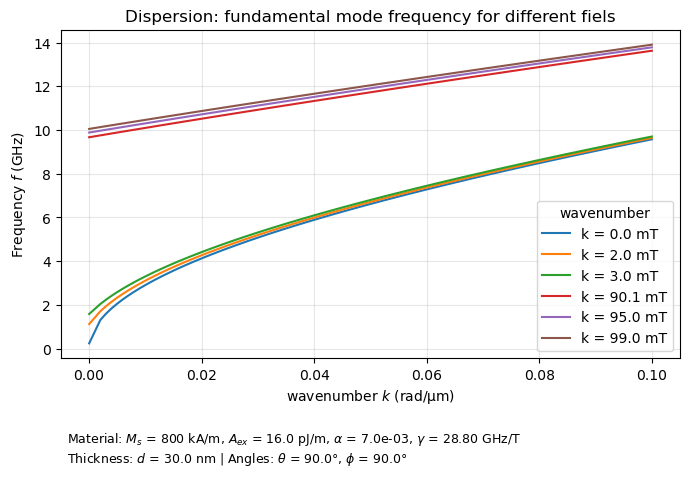

In [19]:
# Choose which k-indices to plot (edit as you like, look at the k-values above)
B_indices = [0, 1, 2, 90, 95, 99]

fig, ax = plt.subplots(figsize=(7, 5))

for Bi in B_indices:
    ax.plot(B, n0[:, Bi], label=f"k = {B[Bi]*1e3:.1f} mT")

ax.set_xlabel(r"wavenumber $k$ (rad/µm)")
ax.set_ylabel(r"Frequency $f$ (GHz)")
ax.set_title("Fundamental mode frequency for different fiels")
ax.grid(True, alpha=0.3)
ax.legend(title="wavenumber")

# --- Info box ---
info_text = (
    r"Material: $M_s$ = {:.0f} kA/m, $A_{{ex}}$ = {:.1f} pJ/m, "
    r"$\alpha$ = {:.1e}, $\gamma$ = {:.2f} GHz/T" "\n"
    r"Thickness: $d$ = {:.1f} nm | Angles: $\theta$ = {:.1f}°, $\phi$ = {:.1f}°"
).format(
    sl.Ms/1e3, sl.Aex*1e12, sl.alpha, sl.gamma/(2*np.pi*1e9),
    sl.d*1e9, np.rad2deg(sl.theta), np.rad2deg(sl.phi)
)

ax.text(
    0.01, -0.22, info_text,
    transform=ax.transAxes, ha="left", va="top", fontsize=9
)

plt.tight_layout()
plt.show()

### Plot the data #3 ###
Because together with mode frequencies we've also calculated decay lenghts, now we can have a look at what is in `decay0` ndarray.

In [8]:
# print what k-values we have available in k array in index:value format, separated by |
print("| ".join(f"{i}:{val/1e6:.2f}" for i, val in enumerate(k)))

0:0.00| 1:0.10| 2:0.20| 3:0.30| 4:0.40| 5:0.50| 6:0.60| 7:0.70| 8:0.80| 9:0.90| 10:1.00| 11:1.10| 12:1.20| 13:1.30| 14:1.40| 15:1.50| 16:1.60| 17:1.70| 18:1.80| 19:1.90| 20:2.00| 21:2.10| 22:2.20| 23:2.30| 24:2.40| 25:2.50| 26:2.60| 27:2.70| 28:2.80| 29:2.90| 30:3.00| 31:3.10| 32:3.20| 33:3.30| 34:3.40| 35:3.50| 36:3.60| 37:3.70| 38:3.80| 39:3.90| 40:4.00| 41:4.10| 42:4.20| 43:4.30| 44:4.40| 45:4.50| 46:4.60| 47:4.70| 48:4.80| 49:4.90| 50:5.00| 51:5.10| 52:5.20| 53:5.30| 54:5.40| 55:5.50| 56:5.60| 57:5.70| 58:5.80| 59:5.90| 60:6.00| 61:6.10| 62:6.20| 63:6.30| 64:6.40| 65:6.50| 66:6.60| 67:6.70| 68:6.80| 69:6.90| 70:7.00| 71:7.10| 72:7.20| 73:7.30| 74:7.40| 75:7.50| 76:7.60| 77:7.70| 78:7.80| 79:7.90| 80:8.00| 81:8.10| 82:8.20| 83:8.30| 84:8.40| 85:8.50| 86:8.60| 87:8.70| 88:8.80| 89:8.90| 90:9.00| 91:9.10| 92:9.20| 93:9.30| 94:9.40| 95:9.50| 96:9.60| 97:9.70| 98:9.80| 99:9.90| 100:10.00


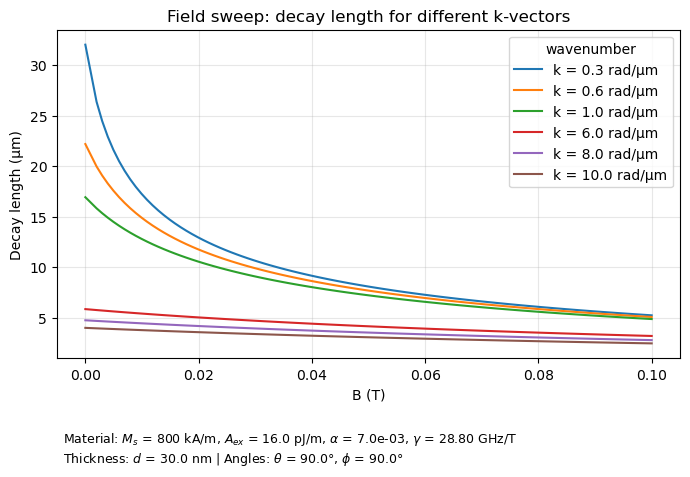

In [14]:
# Choose which k-indices to plot (edit as you like, look at the k-values above)
k_indices = [3, 6, 10, 60, 80, 100]

fig, ax = plt.subplots(figsize=(7, 5))

for ki in k_indices:
    ax.plot(B, decay0[:, ki], label=f"k = {k[ki]*1e-6:.1f} rad/μm")

ax.set_xlabel("B (T)")
ax.set_ylabel("Decay length (μm)")
ax.set_title("Field sweep: decay length for different k-vectors")
ax.grid(True, alpha=0.3)
ax.legend(title="wavenumber")

# --- Info box ---
info_text = (
    r"Material: $M_s$ = {:.0f} kA/m, $A_{{ex}}$ = {:.1f} pJ/m, "
    r"$\alpha$ = {:.1e}, $\gamma$ = {:.2f} GHz/T" "\n"
    r"Thickness: $d$ = {:.1f} nm | Angles: $\theta$ = {:.1f}°, $\phi$ = {:.1f}°"
).format(
    sl.Ms/1e3, sl.Aex*1e12, sl.alpha, sl.gamma/(2*np.pi*1e9),
    sl.d*1e9, np.rad2deg(sl.theta), np.rad2deg(sl.phi)
)

ax.text(
    0.01, -0.22, info_text,
    transform=ax.transAxes, ha="left", va="top", fontsize=9
)

plt.tight_layout()
plt.show()